<h1>Define The problem</h1>
Where did Chase Bank customers deposit the most money last year?<br>
Which bank branch has seen the most growth in deposits? <br>
How did the bank network of branch locations grow over the past century? <br>
What city has the most bank branches per capita?

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('/Users/alanchan/Documents/Github/chasebankDA/chase.csv')

In [3]:
df

,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,JPMorgan Chase Bank,1,JPMorgan Chase Bank Main Office,0,01/01/1824,NaN,1111 Polaris Parkway,Columbus,Delaware,OH,43240,40.14453,-82.99115,633131000.0,743268000.0,832455000.0,916543000.0,1.032549e+09,1.069425e+09,1155185000
1,JPMorgan Chase Bank,0,Vernon Hills Scarsdale Branch,2,03/20/1961,NaN,676 White Plains Road,Scarsdale,Westchester,NY,10583,40.97008,-73.80670,293229.0,310791.0,325742.0,327930.0,3.277920e+05,3.414750e+05,381558
2,JPMorgan Chase Bank,0,Great Neck Northern Boulevard Branch,3,09/09/1963,NaN,410 Northern Boulevard,Great Neck,Nassau,NY,11021,40.77944,-73.72240,191011.0,206933.0,216439.0,237983.0,2.341830e+05,2.624550e+05,278940
3,JPMorgan Chase Bank,0,North Hartsdale Branch,4,02/19/1966,NaN,353 North Central Avenue,Hartsdale,Westchester,NY,10530,41.02654,-73.79168,87110.0,88367.0,93163.0,109659.0,1.119850e+05,1.167720e+05,140233
4,JPMorgan Chase Bank,0,Lawrence Rockaway Branch,5,01/16/1965,NaN,335 Rockaway Turnpike,Lawrence,Nassau,NY,11559,40.62715,-73.73675,172608.0,172749.0,189413.0,198445.0,2.051980e+05,2.232000e+05,235594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,JPMorgan Chase Bank,0,Alameda and Compton Blvd Branch,7981,11/03/2015,NaN,251 E Compton Blvd,Compton,Los Angeles,CA,90220,33.89601,-118.22084,NaN,NaN,NaN,NaN,NaN,NaN,3446
5409,JPMorgan Chase Bank,0,Charleston and Rancho,7982,02/02/2016,NaN,2311 W Chafrleston Blvd,Las Vegas,Clark,NV,89102,36.14270,-115.19043,NaN,NaN,NaN,NaN,NaN,NaN,2666
5410,JPMorgan Chase Bank,0,Los Olivos Branch,7984,03/15/2016,NaN,8593 Irvine Center Drive,Irvine,Orange,CA,92618,33.64412,-117.74453,NaN,NaN,NaN,NaN,NaN,NaN,6689
5411,JPMorgan Chase Bank,0,Lake Forest Branch,7988,01/01/2016,NaN,5660 Read Blvd,New Orleans,Orleans,LA,70127,30.03205,-89.97260,NaN,NaN,NaN,NaN,NaN,NaN,94133


In [4]:
df.isna().sum()

Institution Name       0
Main Office            0
Branch Name            0
Branch Number          0
Established Date       0
Acquired Date       1615
Street Address         0
City                   0
County                 0
State                  0
Zipcode                0
Latitude              66
Longitude             66
2010 Deposits        740
2011 Deposits        578
2012 Deposits        329
2013 Deposits        175
2014 Deposits         56
2015 Deposits         19
2016 Deposits          0
dtype: int64

<AxesSubplot:xlabel='2016 Deposits', ylabel='State'>

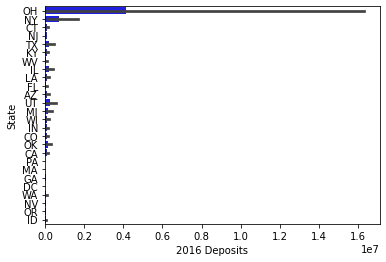

In [5]:
sns.barplot(x="2016 Deposits", y="State", data=df,color="b")

In [20]:
filtered_df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a map object centered on the United States
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Generate a list of coordinates for the HeatMap layer
coordinates = filtered_df[['Latitude', 'Longitude']].values

# Add the HeatMap layer to the map
HeatMap(coordinates).add_to(m)

In [21]:
m